In [1]:
from proximitylib import *

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 14}

mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = 6,3.6
mpl.rcParams['figure.facecolor'] = "w"

comp_per = pickle.load(open("comp_per.p","rb"))

## Periodic case

In [2]:
comp_per = pickle.load(open("comp_per.p","rb"))

In [28]:
[print(key) for key in comp_per.keys()]

keys = comp_per.keys()
Deltas = {}
Delta_mids = {}
for (beta,L) in keys:
    Deltas[L] = comp_per[(beta,L)]
    Delta_mids[L] = Deltas[L][L//2]
    
Ls = Delta_mids.keys()

(4000, 55)
(4000, 89)
(4000, 145)
(4000, 233)
(4000, 377)
(4000, 610)
(4000, 987)


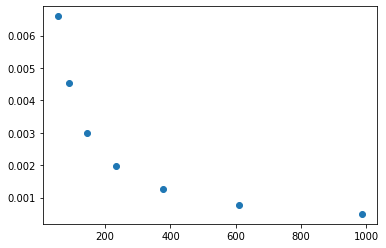

In [29]:
plt.plot([L for L in Ls], [Delta_mids[L] for L in Ls], "o")

['amp', 'offset'] ['x']


Text(0, 0.5, '$\\langle \\Delta_{mid} \\rangle$')

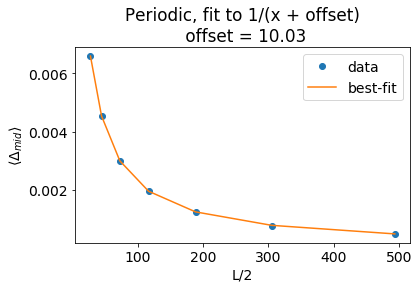

In [61]:
def decay(x, amp,offset):
    return amp * 1/(x + offset)

mod = lmf.Model(decay)

print(mod.param_names, mod.independent_vars)
pars = mod.make_params(amp = 1.0, offset = 0)
scaling_fit = mod.fit([Delta_mids[L] for L in Ls],pars, x=[L/2 for L in Ls])
scaling_fit.plot_fit()
scaling_fit.fit_report()
plt.title("Periodic, fit to 1/(x + offset)\n offset = {:.2f}".format(scaling_fit.params["offset"].value))
plt.xlabel("L/2")
plt.ylabel("$\\langle \Delta_{mid} \\rangle$")

In [51]:
scaling_fit.params["offset"].value

20.063023825787916

## Disordered case

### Weak disorder

In [3]:
comp_dis = pickle.load(open("comp_dis.p","rb"))
[print((key, len(comp_dis[key]))) for key in comp_dis.keys()]
/

((89, 0.15), 2500)
((89, 0.25), 500)
((144, 0.25), 500)
((233, 0.25), 500)
((377, 0.25), 500)
((55, 0.25), 500)
((89, 0.2), 2500)
((89, 0.1), 2500)
((89, 0.05), 2500)
((89, 0.3), 2000)
((144, 0.05), 500)
((233, 0.05), 500)
((377, 0.05), 600)
((55, 0.05), 500)
((89, 0.02), 1000)
((89, 0.12), 1500)
((89, 0.01), 2000)
((89, 0.005), 2500)
((89, 0.0001), 500)
((89, 0.015), 2500)
((89, 0.003), 500)
((89, 0.03), 500)
((89, 0.04), 500)
((89, 0.002), 1500)
((89, 0.35), 500)
((89, 0.4), 1500)
((144, 0.4), 500)
((233, 0.4), 500)
((610, 0.005), 100)
((377, 0.1), 100)
((377, 0.005), 100)
((233, 0.005), 100)
((144, 0.005), 100)
((987, 0.005), 50)
((55, 0.005), 500)
((377, 0.4), 100)
((610, 0.4), 50)
((987, 0.4), 50)
((1597, 0.4), 25)
((610, 0.25), 50)
((89, 0.7), 50)
((144, 0.7), 50)
((233, 0.7), 50)
((377, 0.7), 150)
((610, 0.7), 200)
((987, 0.7), 50)


()

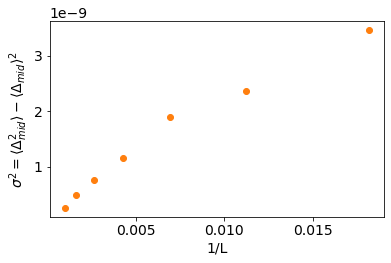

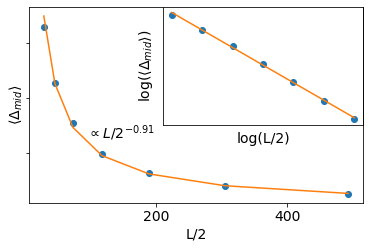

['amp', 'offset'] ['x']


Text(0, 0.5, '$\\langle \\Delta_{mid} \\rangle$')

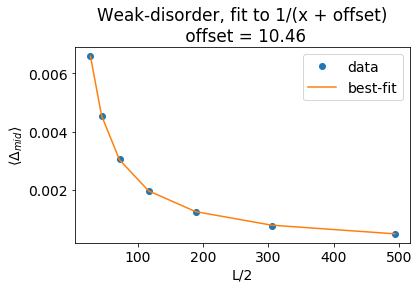

In [64]:
ww = 0.005
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_dis.items():
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
ls = [l for l in sorted(Stats.keys())]

fig, ax1 = plt.subplots()
# ax1.plot(ls,[Stats[l].mean for l in ls], "C0o")
# ax2 = ax1.twinx()
ax1.plot([1/l for l in ls],[Stats[l].variance for l in ls], "C1o")
ax1.set_xlabel("1/L")
ax1.set_ylabel("$\sigma^2 = \\langle\Delta_{mid}^2\\rangle -\\langle\Delta_{mid}\\rangle^2$")


power_fit = scaling(np.array(ls)/2, np.array([np.exp(Stats_log[l].mean) for l in ls]), L_label = "L/2", F_label = "$\\langle\Delta_{mid}\\rangle$")
power_fit.fit_to_pow()

def decay(x, amp,offset):
    return amp * 1/(x + offset)

mod = lmf.Model(decay)

print(mod.param_names, mod.independent_vars)
pars = mod.make_params(amp = 1.0, offset = 0)
scaling_fit = mod.fit([Stats[L].mean for L in ls],pars, x=[L/2 for L in ls])
scaling_fit.plot_fit()
scaling_fit.fit_report()
plt.title("Weak-disorder, fit to 1/(x + offset)\n offset = {:.2f}".format(scaling_fit.params["offset"].value))
plt.xlabel("L/2")
plt.ylabel("$\\langle \Delta_{mid} \\rangle$")

(array([  3.,  14.,  66., 125., 135.,  92.,  36.,  22.,   4.,   3.]),
 array([0.00097841, 0.00119686, 0.0014153 , 0.00163375, 0.0018522 ,
        0.00207064, 0.00228909, 0.00250754, 0.00272598, 0.00294443,
        0.00316288]),
 <a list of 10 Patch objects>)

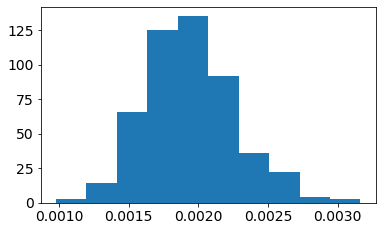

In [9]:
plt.hist(Delta_mids[233])

Text(0, 0.5, 'variance')

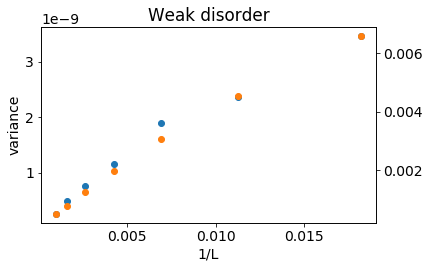

In [67]:
fig, ax1 = plt.subplots()
ax1.plot([1/l for l in ls],[Stats[l].variance for l in ls], "C0o")
ax2 = ax1.twinx()
ax2.plot([1/l for l in ls],[Stats[l].mean for l in ls], "C1o")
ax1.set_title("Weak disorder")
ax1.set_xlabel("1/L")
ax1.set_ylabel("variance")


Text(0.5, 0, 'w')

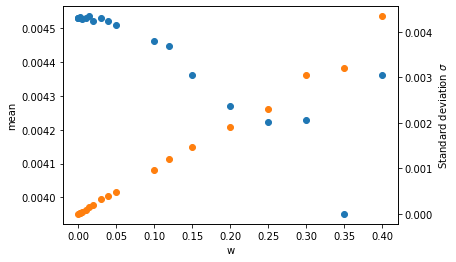

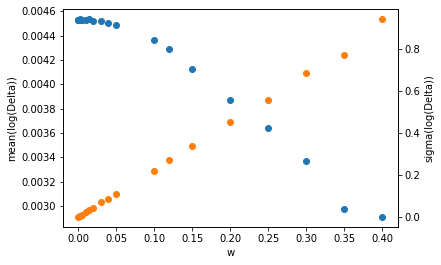

In [4]:
ll = 89
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_dis.items():
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        

Delta_mids[0] = comp_per[(4000,ll)][ll//2]
Stats[0] = stats.describe(Delta_mids[0])
Stats_log[0] = stats.describe(np.log(Delta_mids[0]))
        
ws = [w for w in sorted(Stats.keys()) if Stats[w].nobs][:]
ws.insert(0,0)

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats[w].mean for w in ws], "C0o")
ax1.set_ylabel("mean")
ax1.set_xlabel("w")
ax1.ticklabel_format(style = "sci")
ax2 = ax1.twinx()
ax2.plot(ws,[np.sqrt(Stats[w].variance) for w in ws], "C1o")
ax2.set_ylabel("Standard deviation $\sigma$")

fig, ax1 = plt.subplots()
ax1.plot(ws,[np.exp(Stats_log[w].mean) for w in ws], "C0o")
ax1.set_ylabel("mean(log(Delta))")

ax2 = ax1.twinx()
ax2.plot(ws,[(np.sqrt(Stats_log[w].variance)) for w in ws], "C1o")
ax2.set_ylabel("sigma(log(Delta))")

ax1.set_xlabel("w")

### Strong disorder

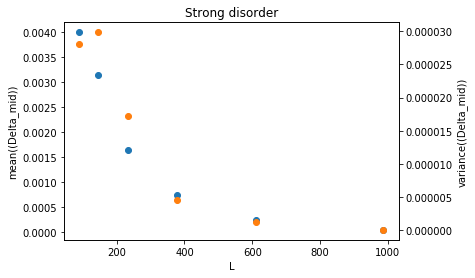

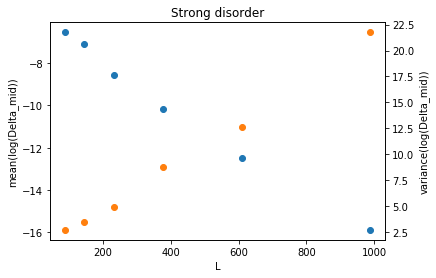

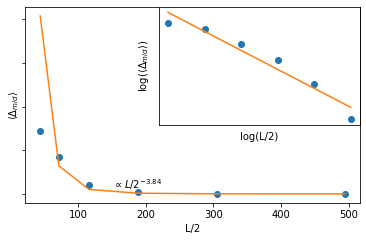

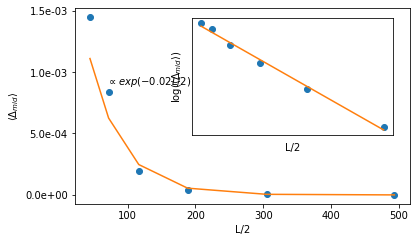

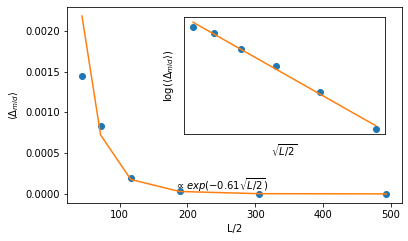

['amp', 'offset'] ['x']


'[[Model]]\n    Model(decay)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 19\n    # data points      = 6\n    # variables        = 2\n    chi-square         = 6.4655e-07\n    reduced chi-square = 1.6164e-07\n    Akaike info crit   = -92.2602139\n    Bayesian info crit = -92.6766950\n[[Variables]]\n    amp:     0.38331604 +/- 0.09494021 (24.77%) (init = 1)\n    offset:  2.84540436 +/- 26.7551949 (940.29%) (init = 0)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(amp, offset) =  0.953'

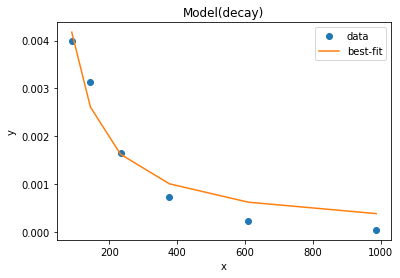

In [4]:

ww = 0.7
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_dis.items():
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
ls = [l for l in sorted(Stats_log.keys())][:]

fig, ax1 = plt.subplots()
ax1.plot([l for l in ls],[Stats[l].mean for l in ls], "C0o")
ax1.set_title("Strong disorder")
ax1.set_ylabel("mean((Delta_mid))")
ax1.set_xlabel("L")
ax2 = ax1.twinx()
ax2.set_ylabel("variance((Delta_mid))")
ax2.plot(ls,[Stats[l].variance for l in ls], "C1o")

fig, ax1 = plt.subplots()
ax1.plot([l for l in ls],[Stats_log[l].mean for l in ls], "C0o")
ax1.set_title("Strong disorder")
ax1.set_ylabel("mean(log(Delta_mid))")
ax1.set_xlabel("L")
ax2 = ax1.twinx()
ax2.set_ylabel("variance(log(Delta_mid))")
ax2.plot(ls,[Stats_log[l].variance for l in ls], "C1o")

power_fit = scaling(np.array(ls)/2, np.array([np.exp(Stats_log[l].mean) for l in ls]), L_label = "L/2", F_label = "$\\langle \Delta_{mid} \\rangle$")
power_fit.fit_to_pow()
power_fit.fit_to_exp()
power_fit.fit_to_expstr()

def decay(x, amp,offset):
    return amp * 1/(x + offset)

mod = lmf.Model(decay)

print(mod.param_names, mod.independent_vars)
pars = mod.make_params(amp = 1.0, offset = 0)
scaling_fit = mod.fit([Stats[l].mean for l in ls],pars, x=[l for l in ls])
scaling_fit.plot_fit()
scaling_fit.fit_report()


Text(0.5, 0, 'w')

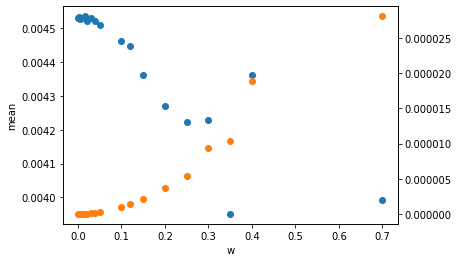

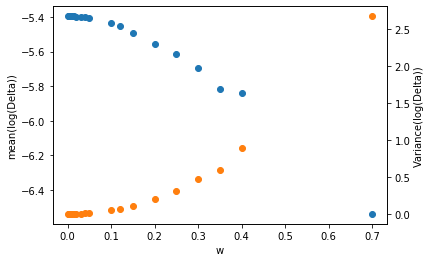

In [4]:
ll = 89
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_dis.items():
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        
ws = [w for w in sorted(Stats.keys())[:]]

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats[w].mean for w in ws], "C0o")
ax1.set_ylabel("mean")
ax1.set_xlabel("w")
ax2 = ax1.twinx()
ax2.plot(ws,[Stats[w].variance for w in ws], "C1o")

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats_log[w].mean for w in ws], "C0o")
ax1.set_ylabel("mean(log(Delta))")

ax2 = ax1.twinx()
ax2.plot(ws,[Stats_log[w].variance for w in ws], "C1o")
ax2.set_ylabel("Variance(log(Delta))")

ax1.set_xlabel("w")

## FC case

In [2]:
comp_FC = pickle.load(open("comp_FC.p","rb"))
keys = sorted(comp_FC.keys())
[print((key, len(comp_FC[key]))) for key in keys]
/

((89, 0.05), 89)
((89, 0.1), 89)
((89, 0.15), 89)
((89, 0.2), 89)
((89, 0.25), 89)
((89, 0.3), 89)
((144, 0.01), 144)
((144, 0.05), 144)
((144, 0.1), 144)
((144, 0.2), 144)
((144, 0.25), 144)
((144, 0.3), 144)
((233, 0.1), 233)
((233, 0.15), 233)
((233, 0.2), 233)
((233, 0.25), 233)
((233, 0.3), 233)
((377, 0.1), 377)
((377, 0.25), 377)
((610, 0.1), 610)
((610, 0.25), 610)
((610, 0.3), 100)
((987, 0.1), 987)
((987, 0.25), 987)


()

Text(0.5, 0, 'w')

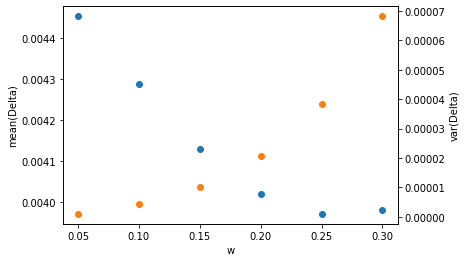

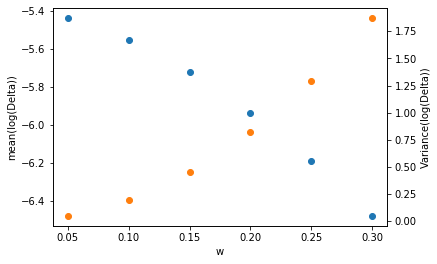

In [9]:
ll = 89
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        
ws = [w for w in sorted(Stats.keys())]

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats[w].mean for w in ws], "C0o")
ax1.set_xlabel("w")
ax1.set_ylabel("mean(Delta)")
ax2 = ax1.twinx()
ax2.plot(ws,[Stats[w].variance for w in ws], "C1o")
ax2.set_ylabel("var(Delta)")

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats_log[w].mean for w in ws], "C0o")
ax1.set_ylabel("mean(log(Delta))")

ax2 = ax1.twinx()
ax2.plot(ws,[Stats_log[w].variance for w in ws], "C1o")
ax2.set_ylabel("Variance(log(Delta))")

ax1.set_xlabel("w")

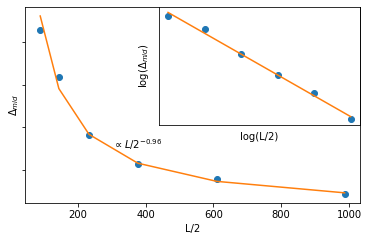

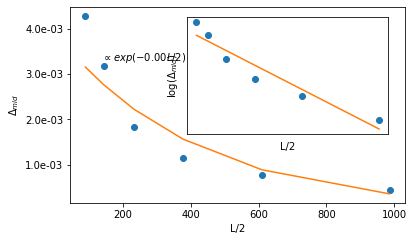

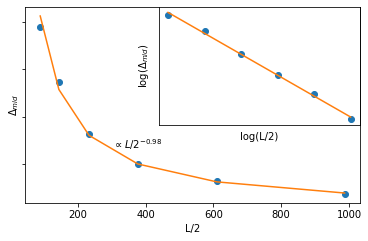

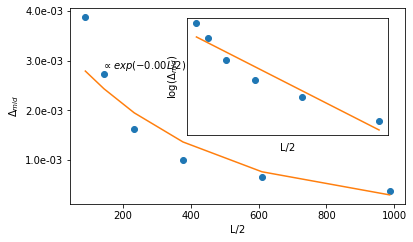

In [14]:
ww = 0.1
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
ls = [l for l in sorted(Stats.keys())[:]]

Ls = np.array(ls)
As = np.array([stats.describe(Delta_mids[l]).mean for l in ls])
Gs = np.array([stats.gmean(Delta_mids[l]) for l in ls])

arith = scaling(Ls, As)
arith.fit_to_pow()
arith.fit_to_exp()

geom = scaling(Ls, Gs)
geom.fit_to_pow()
geom.fit_to_exp()


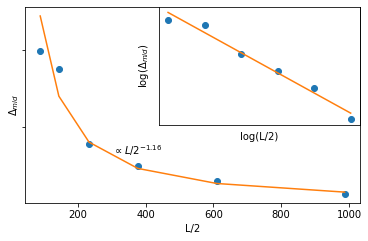

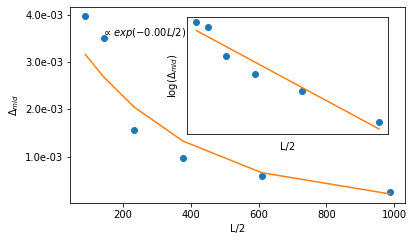

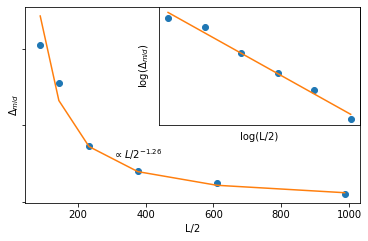

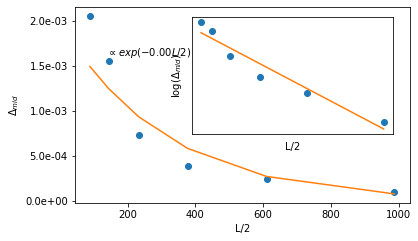

In [15]:
ww = 0.25
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
ls = [l for l in sorted(Stats.keys())[:]]

Ls = np.array(ls)
As = np.array([stats.describe(Delta_mids[l]).mean for l in ls])
Gs = np.array([stats.gmean(Delta_mids[l]) for l in ls])

arith = scaling(Ls, As)
arith.fit_to_pow()
arith.fit_to_exp()

geom = scaling(Ls, Gs)
geom.fit_to_pow()
geom.fit_to_exp()


### Histogram

Text(0.5, 1.0, 'Histogram of log(Delta_mid) 987 sites, tB-tA = 0.25')

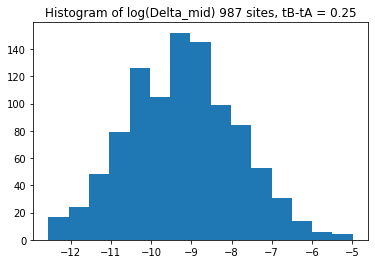

In [7]:
ll = 987
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w), Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        
ws = [w for w in sorted(Stats.keys())]

plt.hist(np.log(Delta_mids[0.25]), bins = 15)
plt.title("Histogram of log(Delta_mid) {} sites, tB-tA = 0.25".format(ll))

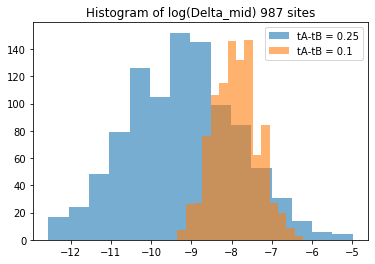

In [9]:
ll = 987
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w), Delta_phis in comp_FC.items():
    Deltas = Delta_phis.values()
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        
ws = [w for w in sorted(Stats.keys())]

plt.hist(np.log(Delta_mids[0.25]), bins = 15, label = "tA-tB = 0.25", alpha = 0.6)
plt.hist(np.log(Delta_mids[0.1]), bins = 15, label = "tA-tB = 0.1", alpha = 0.6)
plt.title("Histogram of log(Delta_mid) {} sites".format(ll))
plt.legend()
plt.show()

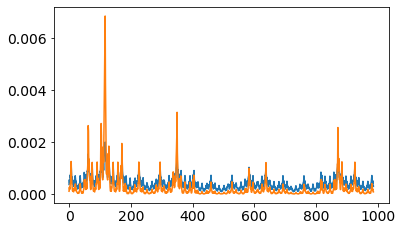

In [25]:
plt.plot(Delta_mids[0.1])
plt.plot(Delta_mids[0.25])

## AAH case

In [70]:
comp_AAH = pickle.load(open("comp_AAH.p","rb"))
keys = sorted(comp_AAH.keys())
[print((key, len(comp_AAH[key]))) for key in keys]
/

((89, 2.0), 89)
((144, 2.0), 144)
((233, 2.0), 233)
((377, 2.0), 377)
((610, 2.0), 610)


()

mean


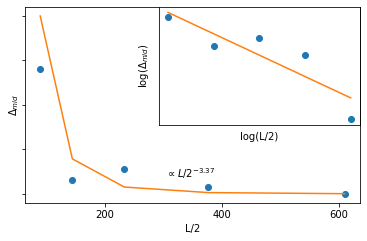

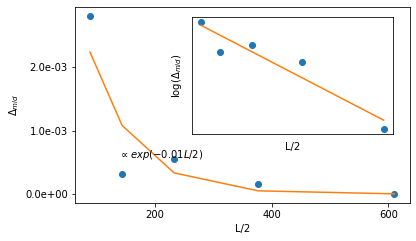

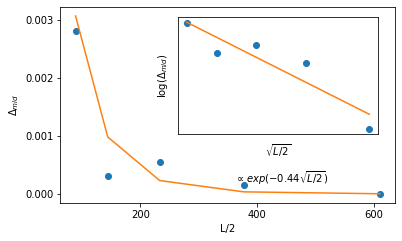

gmean


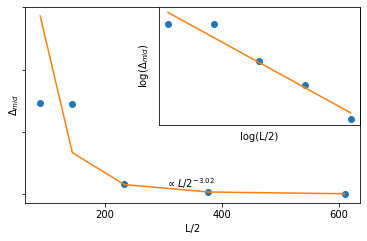

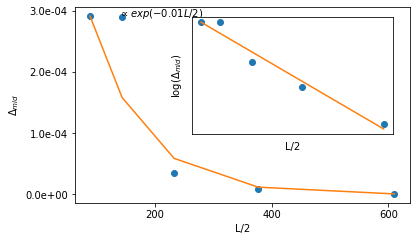

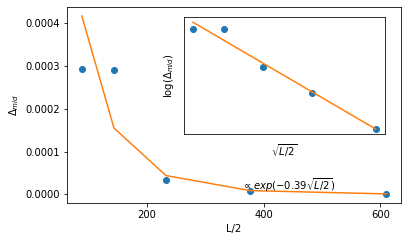

In [71]:
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Delta_phis in comp_AAH.items():
    Deltas = Delta_phis.values()
    Delta_mids[l] = [(Delta[l//2] + Delta[(l-1)//2])/2 for Delta in Deltas]
    Stats[l] = stats.describe(Delta_mids[l])
    Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
ls = [l for l in sorted(Stats.keys())[:]]

# fig, ax1 = plt.subplots()
# ax1.plot(ls,[Stats_log[l].mean for l in ls], "C0o")
# ax1.set_xlabel("L")
# ax1.set_ylabel("mean(log_Delta)")
# ax2 = ax1.twinx()
# ax2.plot(ls,[Stats_log[l].variance for l in ls], "C1o")
# ax2.set_ylabel("var(log_Delta)")

print("mean")

temp = scaling(np.array(ls), np.array([(Stats[l].mean) for l in ls]))
temp.fit_to_pow()
temp.fit_to_exp()
temp.fit_to_expstr()

print("gmean")

temp = scaling(np.array(ls), np.array([(stats.gmean(Delta_mids[l])) for l in ls]))
temp.fit_to_pow()
temp.fit_to_exp()
temp.fit_to_expstr()

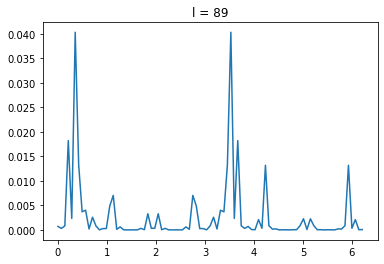

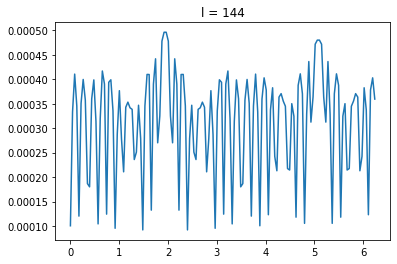

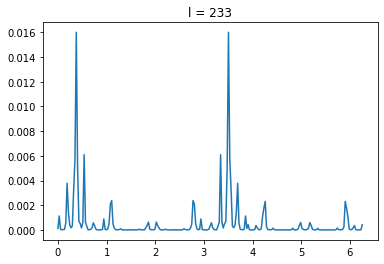

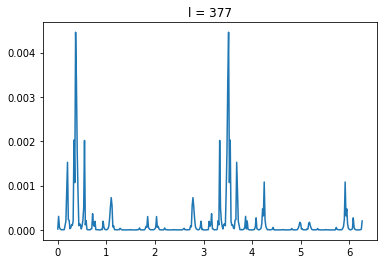

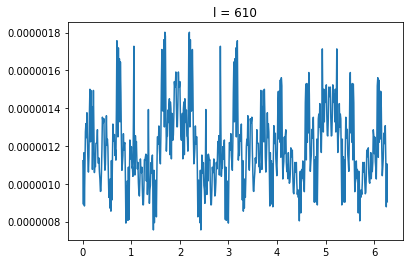

In [72]:
for l in ls:
    phi = 2*np.pi*np.arange(l)/l
    plt.plot(phi,Delta_mids[l])
    plt.title("l = {}".format(l))
    plt.show()


3.9999999999983427


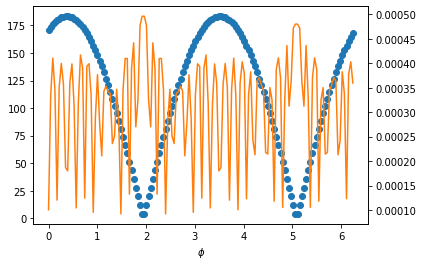

In [77]:
n = 10
wu = 2.0
res_phi = 1
phis = 2*np.pi*np.arange(res_phi*Fibonacci[n])/(res_phi*Fibonacci[n])
palins = []
for phi in phis:
    chain = chainAAH(n, wu = wu, phi = phi)
    palins.append(palinAAH(chain))
  
fig, ax1 = plt.subplots()

ax1.plot(phis, palins,"o")
ax2 = ax1.twinx()
ax2.plot(phis, Delta_mids[144], "C1")
ax1.set_xlabel("$\phi$")
print(min(palins))

In [37]:
def palinAAH(chain):
    N = chain["N"]
    us = chain["u"]
    return np.sum(np.abs(us[:N//2:] -us[(N+1)//2:][::-1]))
    

3.9999999999983427


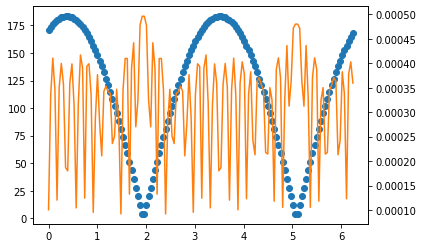

In [52]:
n = 10
wu = 2.0
res_phi = 1
phis = 2*np.pi*np.arange(res_phi*Fibonacci[n])/(res_phi*Fibonacci[n])
palins = []
for phi in phis:
    chain = chainAAH(n, wu = wu, phi = phi)
    palins.append(palinAAH(chain))
  
fig, ax1 = plt.subplots()

ax1.plot(phis, palins,"o")
ax2 = ax1.twinx()
ax2.plot(phis, Delta_mids[144], "C1")
print(min(palins))

In [53]:
4//2

2

In [54]:
3//2

1

## Diagonal Disorder

In [37]:
comp_disdiag = pickle.load(open("comp_disdiag.p","rb"))
[print((key, len(comp_disdiag[key]))) for key in comp_disdiag.keys()]
/

((89, 0.005), 1051)
((144, 0.005), 50)
((233, 0.005), 50)
((377, 0.005), 50)
((610, 0.005), 50)
((987, 0.005), 25)
((1597, 0.005), 10)
((89, 0.25), 1550)
((144, 0.25), 50)
((233, 0.25), 50)
((377, 0.25), 50)
((610, 0.25), 25)
((987, 0.25), 10)
((1597, 0.25), 20)
((89, 0.4), 2500)
((89, 0.8), 500)
((144, 0.8), 50)
((233, 0.8), 50)
((377, 0.8), 50)
((610, 0.8), 50)
((987, 0.8), 25)
((1597, 0.8), 10)
((89, 2.0), 50)
((144, 2.0), 50)
((233, 2.0), 50)
((377, 2.0), 50)
((610, 2.0), 25)
((987, 2.0), 10)


()

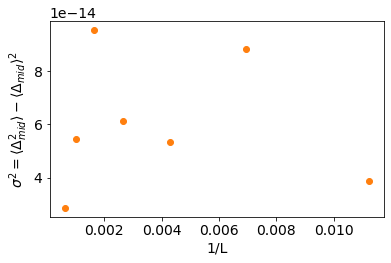

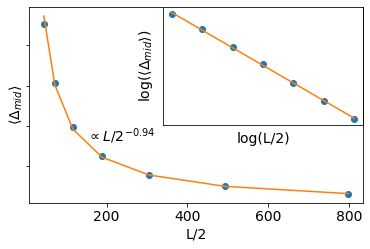

['amp', 'offset'] ['x']


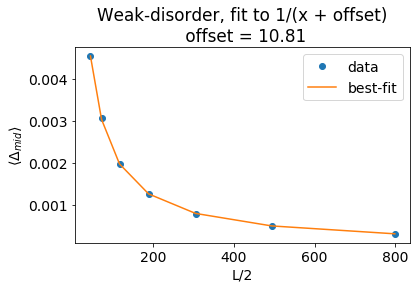

In [44]:
ww = 0.005
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_disdiag.items():
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
ls = [l for l in sorted(Stats.keys())]

fig, ax1 = plt.subplots()
# ax1.plot(ls,[Stats[l].mean for l in ls], "C0o")
# ax2 = ax1.twinx()
ax1.plot([1/l for l in ls],[Stats[l].variance for l in ls], "C1o")
ax1.set_xlabel("1/L")
ax1.set_ylabel("$\sigma^2 = \\langle\Delta_{mid}^2\\rangle -\\langle\Delta_{mid}\\rangle^2$")


power_fit = scaling(np.array(ls)/2, np.array([np.exp(Stats_log[l].mean) for l in ls]), L_label = "L/2", F_label = "$\\langle\Delta_{mid}\\rangle$")
power_fit.fit_to_pow()

def decay(x, amp,offset):
    return amp * 1/(x + offset)

mod = lmf.Model(decay)

print(mod.param_names, mod.independent_vars)
pars = mod.make_params(amp = 1.0, offset = 0)
scaling_fit = mod.fit([Stats[L].mean for L in ls],pars, x=[L/2 for L in ls])
scaling_fit.plot_fit()
scaling_fit.fit_report()
plt.title("Weak-disorder, fit to 1/(x + offset)\n offset = {:.2f}".format(scaling_fit.params["offset"].value))
plt.xlabel("L/2")
plt.ylabel("$\\langle \Delta_{mid} \\rangle$")
plt.show()

(array([  4.,  22.,  50., 197., 494., 215.,  53.,   9.,   5.,   1.]),
 array([0.00453026, 0.00453044, 0.00453062, 0.00453081, 0.00453099,
        0.00453117, 0.00453135, 0.00453154, 0.00453172, 0.0045319 ,
        0.00453209]),
 <a list of 10 Patch objects>)

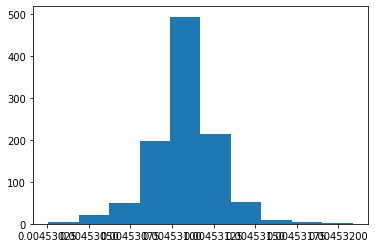

In [10]:
plt.hist(Delta_mids[89])

Text(0.5, 0, 'w')

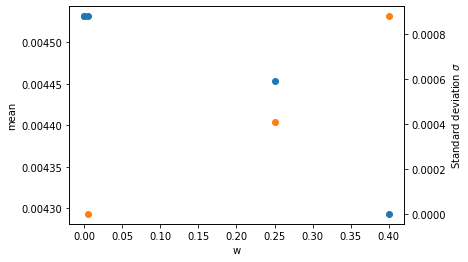

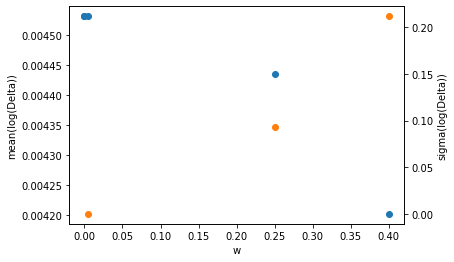

In [23]:
ll = 89
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_disdiag.items():
    if l==ll:
        Delta_mids[w] = [Delta[l//2] for Delta in Deltas]
        Stats[w] = stats.describe(Delta_mids[w])
        Stats_log[w] = stats.describe(np.log(Delta_mids[w]))
        

Delta_mids[0] = comp_per[(4000,ll)][ll//2]
Stats[0] = stats.describe(Delta_mids[0])
Stats_log[0] = stats.describe(np.log(Delta_mids[0]))
        
ws = [w for w in sorted(Stats.keys()) if Stats[w].nobs][:]
ws.insert(0,0)

fig, ax1 = plt.subplots()
ax1.plot(ws,[Stats[w].mean for w in ws], "C0o")
ax1.set_ylabel("mean")
ax1.set_xlabel("w")
ax1.ticklabel_format(style = "sci")
ax2 = ax1.twinx()
ax2.plot(ws,[np.sqrt(Stats[w].variance) for w in ws], "C1o")
ax2.set_ylabel("Standard deviation $\sigma$")

fig, ax1 = plt.subplots()
ax1.plot(ws,[np.exp(Stats_log[w].mean) for w in ws], "C0o")
ax1.set_ylabel("mean(log(Delta))")

ax2 = ax1.twinx()
ax2.plot(ws,[(np.sqrt(Stats_log[w].variance)) for w in ws], "C1o")
ax2.set_ylabel("sigma(log(Delta))")

ax1.set_xlabel("w")

### Strong disorder

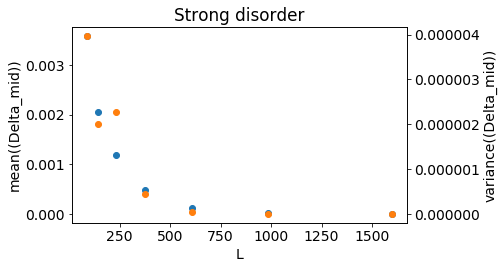

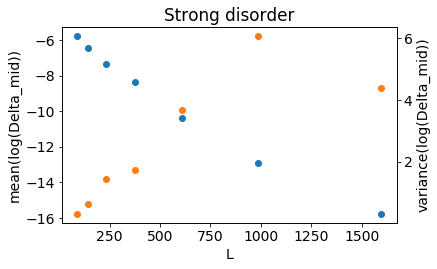

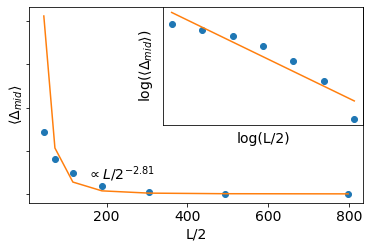

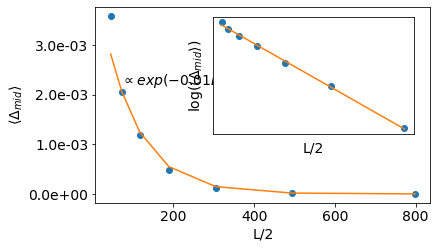

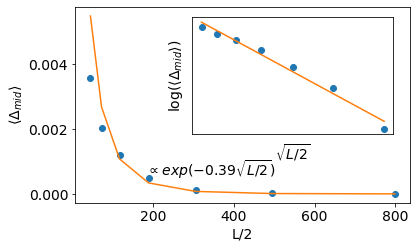

'[[Model]]\n    Model(decay)\n[[Fit Statistics]]\n    # fitting method   = leastsq\n    # function evals   = 22\n    # data points      = 7\n    # variables        = 2\n    chi-square         = 1.8738e-07\n    reduced chi-square = 3.7475e-08\n    Akaike info crit   = -118.052370\n    Bayesian info crit = -118.160550\n[[Variables]]\n    amp:     0.21915232 +/- 0.03220923 (14.70%) (init = 1)\n    offset: -28.5971533 +/- 10.1175282 (35.38%) (init = 0)\n[[Correlations]] (unreported correlations are < 0.100)\n    C(amp, offset) =  0.952'

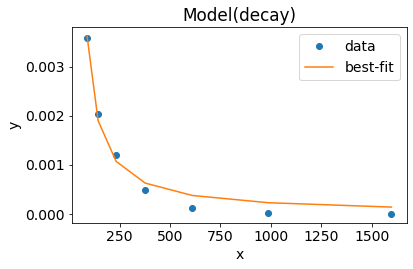

In [45]:
ww = 0.8
Delta_mids = {}
Stats = {}
Stats_log = {}
for (l, w),Deltas in comp_disdiag.items():
    if w==ww:
        Delta_mids[l] = [Delta[l//2] for Delta in Deltas]
        Stats[l] = stats.describe(Delta_mids[l])
        Stats_log[l] = stats.describe(np.log(Delta_mids[l]))
        
ls = [l for l in sorted(Stats_log.keys())][:]

fig, ax1 = plt.subplots()
ax1.plot([l for l in ls],[Stats[l].mean for l in ls], "C0o")
ax1.set_title("Strong disorder")
ax1.set_ylabel("mean((Delta_mid))")
ax1.set_xlabel("L")
ax2 = ax1.twinx()
ax2.set_ylabel("variance((Delta_mid))")
ax2.plot(ls,[Stats[l].variance for l in ls], "C1o")

fig, ax1 = plt.subplots()
ax1.plot([l for l in ls],[Stats_log[l].mean for l in ls], "C0o")
ax1.set_title("Strong disorder")
ax1.set_ylabel("mean(log(Delta_mid))")
ax1.set_xlabel("L")
ax2 = ax1.twinx()
ax2.set_ylabel("variance(log(Delta_mid))")
ax2.plot(ls,[Stats_log[l].variance for l in ls], "C1o")
plt.show()

power_fit = scaling(np.array(ls)/2, np.array([Stats[l].mean for l in ls]), L_label = "L/2", F_label = "$\\langle \Delta_{mid} \\rangle$")
power_fit.fit_to_pow()
power_fit.fit_to_exp()
power_fit.fit_to_expstr()

def decay(x, amp,offset):
    return amp * 1/(x + offset)

mod = lmf.Model(decay)
pars = mod.make_params(amp = 1.0, offset = 0)
scaling_fit = mod.fit([Stats[l].mean for l in ls],pars, x=[l for l in ls])
scaling_fit.plot_fit()
scaling_fit.fit_report()


In [40]:
Stats

{89: DescribeResult(nobs=50, minmax=(7.046104281109504e-06, 0.009444424192861189), mean=0.0009160168896701231, variance=2.787807968919366e-06, skewness=3.3659972815483674, kurtosis=12.667173045200615),
 144: DescribeResult(nobs=50, minmax=(7.368610842938784e-08, 0.004366434560714414), mean=0.00034645837918996774, variance=6.628652278228858e-07, skewness=3.381173393898106, kurtosis=11.824279586268087),
 233: DescribeResult(nobs=50, minmax=(2.015448029618593e-10, 0.0005802898265748889), mean=3.133946285105255e-05, variance=1.123071636648826e-08, skewness=4.3887055307396645, kurtosis=18.439740913001803),
 377: DescribeResult(nobs=50, minmax=(1.0666013074087663e-13, 1.243943421166926e-05), mean=6.705506160858099e-07, variance=4.487568999612824e-12, skewness=4.2208553165659, kurtosis=18.75212639566102),
 610: DescribeResult(nobs=25, minmax=(-2.380451387599419e-16, 5.624874318506443e-08), mean=5.665179575448621e-09, variance=2.220660857131429e-16, skewness=2.542462654204894, kurtosis=4.96812

(array([ 87., 181., 132.,  61.,  19.,   9.,   4.,   5.,   1.,   1.]),
 array([0.00048177, 0.00193063, 0.0033795 , 0.00482837, 0.00627724,
        0.00772611, 0.00917498, 0.01062385, 0.01207272, 0.01352158,
        0.01497045]),
 <a list of 10 Patch objects>)

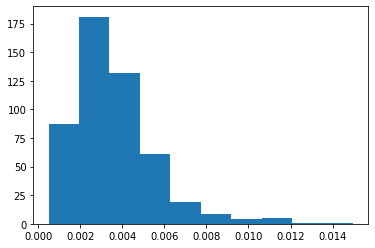

In [4]:
plt.hist(Delta_mids[89])